# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
import json
import random 
from pprint import pprint
import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations; draws samples from a uniform distribution
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [36]:
url = "http://api.openweathermap.org/data/2.5/weather?q="
#for testing purposes; randomly chooses 120 cities from the cities list generated in the starter code above
#limiter = 0
#random_cities = []
#while limiter < 120:
    #random_cities.append(random.choice(cities))
    #limiter += 1
    
#an empty list to hold all the json files 
json_test = []

#running process log of the queries
print("Beginning Data Retrieval\n--------------------------------------")

#the x is initialized at 1 for the "for loop" below; the x is used to log the ordinal progress of the process log
x = 1
counter = 1
#for every city in the list "cities" the below code is executed
for city_name in cities:
    if x == 51:
        x = x - 50
        counter += 1
    query_url = (f"{url}{city_name}&APPID={api_key}&units=imperial")
    response = requests.get(query_url)
    city_weather_json = requests.get(query_url).json()
    text = str(response)
    #if the text of the response is <Response [200]>, pass it through as a successful entry
    if text == "<Response [200]>":
        print(f"Processing Record {x} of Set {counter} | {city_name}")
        json_test.append(city_weather_json)
        x += 1
    #otherwise, print the below error message and do NOT increase the value of the "x" 
    elif text != "<Response [200]>":
        print("City not found. Skipping...")
    #prevents web service from blocking me due to too many queries too quickly
    time.sleep(1.2)
print("--------------------------------------\nData Retrieval Complete\n--------------------------------------")


Beginning Data Retrieval
--------------------------------------
Processing Record 1 of Set 1 | avarua
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | provideniya
Processing Record 4 of Set 1 | nefteyugansk
Processing Record 5 of Set 1 | viedma
Processing Record 6 of Set 1 | sitka
Processing Record 7 of Set 1 | beitbridge
Processing Record 8 of Set 1 | gigmoto
Processing Record 9 of Set 1 | husavik
Processing Record 10 of Set 1 | ishinomaki
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | filimonovo
Processing Record 13 of Set 1 | saint-francois
Processing Record 14 of Set 1 | sisimiut
City not found. Skipping...
Processing Record 15 of Set 1 | homa bay
Processing Record 16 of Set 1 | port-gentil
Processing Record 17 of Set 1 | san juan
Processing Record 18 of Set 1 | tuktoyaktuk
Processing Record 19 of Set 1 | brae
Processing Record 20 of Set 1 | bluff
Processing Record 21 of Set 1 | batagay-alyta
Processing Record 22 of Set 1 | yerbogachen
P

City not found. Skipping...
Processing Record 34 of Set 4 | sayat
Processing Record 35 of Set 4 | souillac
Processing Record 36 of Set 4 | mount hagen
Processing Record 37 of Set 4 | cabo san lucas
Processing Record 38 of Set 4 | castro
Processing Record 39 of Set 4 | hirara
Processing Record 40 of Set 4 | jutai
Processing Record 41 of Set 4 | nanortalik
Processing Record 42 of Set 4 | yerofey pavlovich
Processing Record 43 of Set 4 | saint george
Processing Record 44 of Set 4 | katherine
Processing Record 45 of Set 4 | sorland
City not found. Skipping...
Processing Record 46 of Set 4 | tura
Processing Record 47 of Set 4 | taltal
Processing Record 48 of Set 4 | gola bazar
Processing Record 49 of Set 4 | dordrecht
Processing Record 50 of Set 4 | nabire
Processing Record 1 of Set 5 | suruc
Processing Record 2 of Set 5 | cacoal
Processing Record 3 of Set 5 | leh
Processing Record 4 of Set 5 | ust-nera
Processing Record 5 of Set 5 | katsuura
Processing Record 6 of Set 5 | khatanga
City not

Processing Record 21 of Set 8 | wajir
Processing Record 22 of Set 8 | montreal
Processing Record 23 of Set 8 | bahia honda
Processing Record 24 of Set 8 | liverpool
Processing Record 25 of Set 8 | santa cruz de la palma
City not found. Skipping...
Processing Record 26 of Set 8 | ayr
Processing Record 27 of Set 8 | ahome
City not found. Skipping...
Processing Record 28 of Set 8 | lagoa
Processing Record 29 of Set 8 | malanje
Processing Record 30 of Set 8 | muros
Processing Record 31 of Set 8 | sawtell
Processing Record 32 of Set 8 | hagere selam
Processing Record 33 of Set 8 | diapaga
Processing Record 34 of Set 8 | mazyr
Processing Record 35 of Set 8 | oranjemund
Processing Record 36 of Set 8 | mehamn
Processing Record 37 of Set 8 | kushima
Processing Record 38 of Set 8 | sistranda
Processing Record 39 of Set 8 | inuvik
Processing Record 40 of Set 8 | nioro
Processing Record 41 of Set 8 | bilma
Processing Record 42 of Set 8 | shimoda
Processing Record 43 of Set 8 | xingyi
Processing Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [37]:
csv_columns = ['City Name', 'Cloudiness','Country','Date','Humidity','Latitude','Longitude','Max Temperature','Wind Speed']
with open('file.csv', mode='w') as file:
        writer = csv.writer(file, delimiter=',')
        writer.writerow(csv_columns)
#for every json data set in json_test list, extract only the below information
#x is initialized to zero so that the below can reference the correct "key" in list of json dictionaries
x=0
for dataset in json_test:
    city_name = json_test[x]['name']
    cloudiness = json_test[x]['clouds']['all']
    country = json_test[x]['sys']['country']
    date = json_test[x]['dt']
    humidity = json_test[x]['main']['humidity']
    lat = json_test[x]['coord']['lat']
    lon = json_test[x]['coord']['lon']
    max_temp = json_test[x]['main']['temp_max']
    wind_speed = json_test[x]['wind']['speed']
    data_list =[city_name,cloudiness,country,date,humidity,lat,lon,max_temp,wind_speed]
    with open('file.csv',mode='a') as csv_file:
        csv_file = csv.writer(csv_file, delimiter=',')
        csv_file.writerow(data_list)
    x += 1


In [38]:
file = 'file.csv'
data_Frame = pd.read_csv(file)
data_Frame.head(100)

,City Name,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,Avarua,75,CK,1545271200,78,-21.21,-159.78,82.40,5.82
1,Bethel,90,US,1545271680,77,60.79,-161.76,-2.21,2.62
2,Provideniya,0,RU,1545271200,63,64.42,-173.23,-5.81,4.47
3,Nefteyugansk,40,RU,1545271200,75,61.09,72.61,-18.41,8.95
4,Viedma,76,AR,1545272566,43,-40.81,-62.99,74.43,10.56
5,Sitka,0,US,1545272567,45,37.17,-99.65,47.39,14.47
6,Beitbridge,0,ZA,1545272569,68,-22.21,29.99,75.74,8.66
7,Gigmoto,92,PH,1545272570,100,13.78,124.39,79.88,20.85
8,Husavik,68,CA,1545272571,91,50.56,-96.99,21.96,18.05
9,Ishinomaki,40,JP,1545271200,43,38.42,141.30,50.00,18.34


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

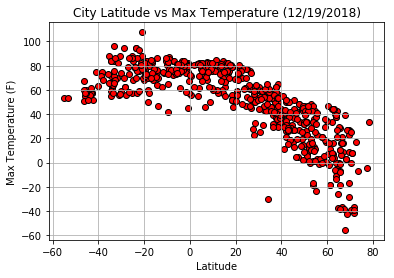

In [39]:
def scatterplot(x_axis,y_axis,unit,color):
    date = datetime.datetime.today().strftime('%m/%d/%Y')
    plt.scatter(data_Frame[x_axis],data_Frame[y_axis], c = color, edgecolors = "black", marker = "o")
    plt.grid()
    plt.xlabel(f"{x_axis}")
    plt.ylabel(f"{y_axis} ({unit})")
    plt.title(f"City Latitude vs {y_axis} ({date})")
    plt.show 
    plt.savefig(f"../starter_code/City Latitude vs {y_axis}.png")
scatterplot('Latitude','Max Temperature','F','red')

#### Latitude vs. Humidity Plot

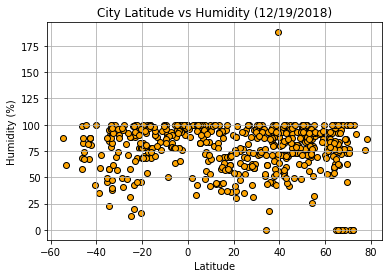

In [40]:
scatterplot('Latitude','Humidity','%','orange')

#### Latitude vs. Cloudiness Plot

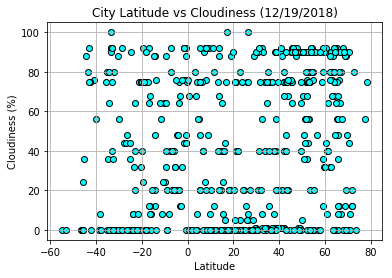

In [41]:
scatterplot('Latitude','Cloudiness','%',"cyan")

#### Latitude vs. Wind Speed Plot

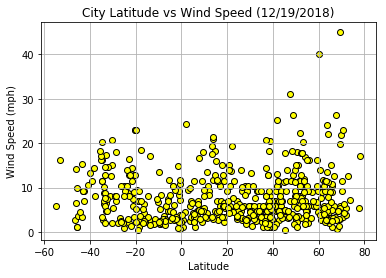

In [42]:
scatterplot('Latitude','Wind Speed','mph',"yellow")